# Raw to Txt converter Avantes

In [1]:
import numpy as np
from avaspec import *

In [2]:
AVS_Init(0)
ret = AVS_GetNrOfDevices()
ret

1

In [3]:
req = 75*ret
a_pList = AvsIdentityType * ret 
a_pList = AVS_GetList(req)
a_pList

In [4]:
handle = AVS_Activate(a_pList[0])

In [5]:
config = DeviceConfigType
ret = AVS_GetParameter(handle, 63484)
pixels = ret.m_Detector_m_NrPixels
wavelengths = []
ret = AVS_GetLambda(handle)
for pixel in range(pixels):
    wavelengths.append(ret[pixel])

In [6]:
measconfig = MeasConfigType 
measconfig.m_StartPixel = 0 
measconfig.m_StopPixel = pixels - 1 
measconfig.m_IntegrationTime = 50 
measconfig.m_IntegrationDelay = 0 
measconfig.m_NrAverages = 1 
measconfig.m_CorDynDark_m_Enable = 0 
measconfig.m_CorDynDark_m_ForgetPercentage = 100 
measconfig.m_Smoothing_m_SmoothPix = 0 
measconfig.m_Smoothing_m_SmoothModel = 0 
measconfig.m_SaturationDetection = 0 
measconfig.m_Trigger_m_Mode = 0 
measconfig.m_Trigger_m_Source = 0 
measconfig.m_Trigger_m_SourceType = 0 
measconfig.m_Control_m_StrobeControl = 0 
measconfig.m_Control_m_LaserDelay = 0 
measconfig.m_Control_m_LaserWidth = 0 
measconfig.m_Control_m_LaserWaveLength = 0.0 
measconfig.m_Control_m_StoreToRam = 0

In [33]:
AVS_PrepareMeasure(handle, measconfig)

0

In [34]:
scans = 1
AVS_Measure(handle, 0, scans)

0

In [35]:
import time
dataready = False
while not dataready:
    dataready = AVS_PollScan(handle)
    print(dataready, end = '\r')
    time.sleep(measconfig.m_IntegrationTime/1000)

In [36]:
timestamp = 0
spectraldata = []
ret = AVS_GetScopeData(handle)
timestamp = ret[0]
for i,pix in enumerate(wavelengths):
    spectraldata.append(ret[1][i])

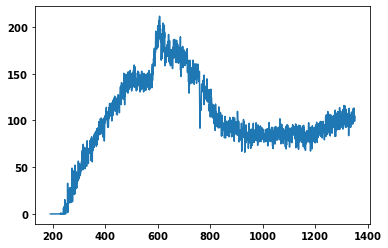

In [37]:
import matplotlib.pyplot as plt
plt.plot(wavelengths,spectraldata)